# Notebook E-tivity 3 CE4021 Task 1

Student name: Bartlomiej Mlynarkiewicz

Student ID: 17241782

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1: Option Height

Observing the average height of customers of a theme park to establish the mean and standard deviation.

### Requirements

- Briefly explain the type of random variable and probability distribution you will use. The choice of a continuous or a discrete random variable, and the probability distribution (normal, uniform, binomial, ..) should be informed by the type of experiment.<br /><br />
- Write Python code to simulate the experiment. The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:<br />
    1. The expected value of your random variable.
    2. The standard deviation of your random variable.
    3. Plot the distribution found in your simulated experiment with an appropriate number of 'bins'



**N.B.:**

- Structure your notebook as follows:
    1. Markdown cell with problem description.
    2. Markdown cells with expected value and standard deviation of your random variable.
    3. Cell(s) with experiment.
    4. Cell(s) with outputs and graphs.
    5. Commentary comparing calculated values to experimentally obtained values.
<br /><br />
- You may only use the following modules:
    - Random
    - Numpy
    - A visualisation module such as Matplotlib
    - Math
<br /><br />
- You are not required to perform exception handling.
- You are not required to provide tests for your code.

### Background:

The distribution of the average height of customers at a theme park can be approximated by a `normal distribution` (also known as a `Gaussian distribution` or `bell curve`).

The following are a subset of condition which should be met to use normal distribution for approximation of the average height of customers.

**Central Limit Theorem (CLT):** The average height of customers is the result of combining many independent and identically distributed random factors. If the sample size is sufficiently large (grater then 30) then the distribution of the sample mean will tend to be approximately normal, regardless of the underlying distribution of individual heights.

**Finite Variance:** The individual heights should have finite variance.

Under these conditions, the average height of customers at the theme park will follow a `normal distribution`. The mean of this distribution will be approximately equal to the true population mean, and the standard deviation will be equal to the population standard deviation divided by the square root of the sample size.

The function gives the probability that an event will fall between any two real number limits as the curve approaches zero on either side of the mean. Area underneath the normal curve is always equal to 1.

The curve itself is approximately bell shaped, and is therefore informally called the Bell Curve. 

### Type of Random Variable & Type of Probability Distribution

**Type of Random Variable:** The average height of customers at a theme park is a `continuous random` variable.

This is because height is a continuous measurement that can theoretically take on any real value within a certain range. Continuous random variables are characterized by a continuous probability distribution, often modeled using the normal distribution when certain conditions, like the Central Limit Theorem, are met.

**Type of Probability Distribution:** The average height of customers at a theme park is a `normal distribution` variable.

The normal distribution is commonly used when dealing with continuous random variables that exhibit a bell-shaped curve. It's appropriate for data that are symmetrically distributed around a mean, and it's often used for modeling averages when the Central Limit Theorem applies.

A larger sample size tends to result in a smaller standard deviation of the average height because larger samples reduce the sampling variability. However, the actual value of the standard deviation depends on the variability in individual heights within the population.

### Data:

For generating the sample data the following two variables are required:

1. Mean value μ
2. Standard deviation σ

#### Mean value μ

The mean also known as the average is a measure of central tendency that represents the arithmetic average of a set of values. The mean is calculated by adding up all the values in a dataset and then dividing the sum by the number of values.

$$
μ=\frac{\sum_{i=1}^Nx_i}{n}
$$

#### Standard deviation σ


The standard deviation is a measure of the amount of variation or dispersion in a set of values. It quantifies how spread out the data points are from the mean of the dataset. In other words, it tells you how much individual data points tend to deviate from the mean. A small standard deviation indicates that the data points are close to the mean, while a large standard deviation suggests that the data points are more spread out.


$$
σ=\sqrt{\frac{\sum_{i=1}^N(x_i - μ)^2}{N}}
$$

### Data source

Based on the observability of WHO (World Health Organization) from 2007 the mean height of girls aged 5 to 19 [1] years old is between `109.6016` cm to `163.1548` cm and the mean height of boys aged 5 to 19 [2] years old is between `110.2647` cm to `176.5432` cm. However, the height of girls recorded ranges from 98.5 cm to 178.4 cm and the height of boys recorded ranges from `99.6` cm to `193.5` cm.

The standard deviation ranges from `4.7731` to `6.5409` for height of girls aged 5 to 19 years old and `4.5914` to `7.2983` for height of boys aged 5 to 19 years old. Therefore I will use the mean of the sum of the upper limit of the standard deviation for both girls and boys as the standard deviation of the population.

$$
σ = (7.2983 + 6.5409) / 2 = 6.9196\\
μ = (98 + 194) / 2 = 146 cm
$$

** Round σ to two decimal places = `6.92`**

**Therefore σ = `6.92` and μ = `146 cm`**

Therefore based on the observed height ranges I will use **6.92** as the standard deviation and **146 cm** as the mean for generating sample using the gauss method which is used to get a floating value chosen from a Gaussian or normal distribution with the given mean and standard deviation.

In [2]:
def generate_sample_heights(sample_size: int, mean: float, std_dev: float) -> list[float]:
    """
    Generate a random sample of heights.

    
    Parameters
    ----------
    sample_size : int
        A number of random heights to be generated.
        
    mean: float
        The mean used to generate the random data.
        
    std_dev: float
        The std used to generate the random data.
            
    Returns
    -------
    list[float]
        Returns a list of generated heights.
    """
    
    
    return np.random.normal(mean, std_dev, sample_size)

### Empirical rule:

The empirical rule, or the 68-95-99.7 rule, tells us where most of your values lie in a normal distribution:

- Around 68% of values are within 1 standard deviation from the mean.
- Around 95% of values are within 2 standard deviations from the mean.
- Around 99.7% of values are within 3 standard deviations from the mean.

### Probability density function of the normal distribution

The Probability Density Function (PDF) of the normal distribution, also known as the Gaussian distribution or the bell curve describes the probability of a continuous random variable taking on a specific value within a certain range. 

$$
f\{x\} = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - μ}{\sigma})^2}
$$

**Where:**

- $f\{x\}$ is the probability customer height
- $μ$ is the mean customer height in the population ($u$ = 146 cm from the sample data)
- $\sigma$ is the standard deviation of customer height in the population ($\sigma$ = 6.9196 from the sample data)

This PDF describes the shape of the normal distribution, which is a symmetric, bell-shaped curve. The probability density is highest at the mean (μ), and it decreases as you move away from the mean in both directions. The spread or width of the curve is determined by the standard deviation (σ).

### CDF of the standard normal distribution

The CDF of the standard normal distribution gives the probability that a standard normal random variable will be less than or equal to a given value x.

$$
Φ(x)=P(Z≤x)=\frac{1}{\sqrt{2\pi}}\int e^{-\frac{u^2}{2}}dy.
$$



In [3]:
from scipy.stats import norm 
def visualise_data(mean: float, std: float, sample_size: int):
    """
    Visualises the generated data.

    Parameters
    ----------
    mean : float
        A mean of the populaton.
        
    std: float
        The standard deviation of the population.
        
    sample_size: int, optional
        The size of the sample to be generated.
        
    Returns
    ----------
    None
    """
    
    # Use the The Rice Rule [3] for calculating the number of bins
    bins = round(sample_size**(1/3))
    
    generated_sample_heights = generate_sample_heights(sample_size, mean, std)
    
    # Calculate the mean of the generated data
    mean = np.mean(generated_sample_heights)
    # Calculate the mean of the generated data
    std_dev = np.std(generated_sample_heights)
    
    print("Number Of Heights Observed:",sample_size)
    print("Mean:",mean)
    print("Standard Deviation:",std_dev)
    print("Bin size:",bins)
    
    
    # Get evenly spaced numbers 
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
    # Calculate y values using the PDF of a normal distribution formula for plotting the bell curve.
    y = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5*((x - mean)/std_dev)**2)
    
    # Plot the PDF and CDF of normal distribution
    plt.figure(figsize=(15, 5))
    
    sigma_symb = r'$\sigma$'
    mean_symb = r'$\mu$'
    plt.subplot(1, 2, 1)
    plt.hist(generated_sample_heights, bins=bins, 
             align='left', rwidth=0.8, density=True)
    plt.title("PDF - Number Of Heights Observed of Customers at Theme Park")
    plt.xlabel("Avergae Height (cm)")
    plt.ylabel("Probability Density")
    plt.plot(x, y, color='red')
    plt.axvline(mean, color='r', linewidth=1, label=f"{mean_symb}: {round(mean, 2)}")
    plt.axvline(mean-std_dev, color='g', linestyle='dashed', linewidth=1, label=f"{mean_symb} +- {sigma_symb}: {round(mean - std, 2)} - {round(mean + std, 2)}")
    plt.axvline(mean+std_dev, color='g', linestyle='dashed', linewidth=1)
    plt.axvline(mean-(2*std_dev), color='y', linestyle='dashed', linewidth=1, label=f"{mean_symb} +- 2{sigma_symb}: {round(mean - (2*std), 2)} - {round(mean + (2*std), 2)}")
    plt.axvline(mean+(2*std_dev), color='y', linestyle='dashed', linewidth=1)
    plt.axvline(mean-(3*std_dev), color='r', linestyle='dashed', linewidth=1, label=f"{mean_symb} +- 3{sigma_symb}: {round(mean - (3*std), 2)} - {round(mean + (3*std), 2)}")
    plt.axvline(mean+(3*std_dev), color='r', linestyle='dashed', linewidth=1)
    plt.legend() 
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.hist(generated_sample_heights, bins=bins, 
             align='left', rwidth=0.8, density=True, cumulative=True)
    plt.plot(x, np.cumsum(y / sum(y)) , color='red')
    plt.xlabel("Avergae Height (cm)")
    plt.ylabel("Probability Density")
    plt.title("CDF - Number Of Heights Observed of Customers at Theme Park")
    plt.tight_layout()
    plt.show()

In [4]:
mean = 146
std = 6.92

Number Of Heights Observed: 100
Mean: 145.99406379333274
Standard Deviation: 6.592289160894079
Bin size: 5


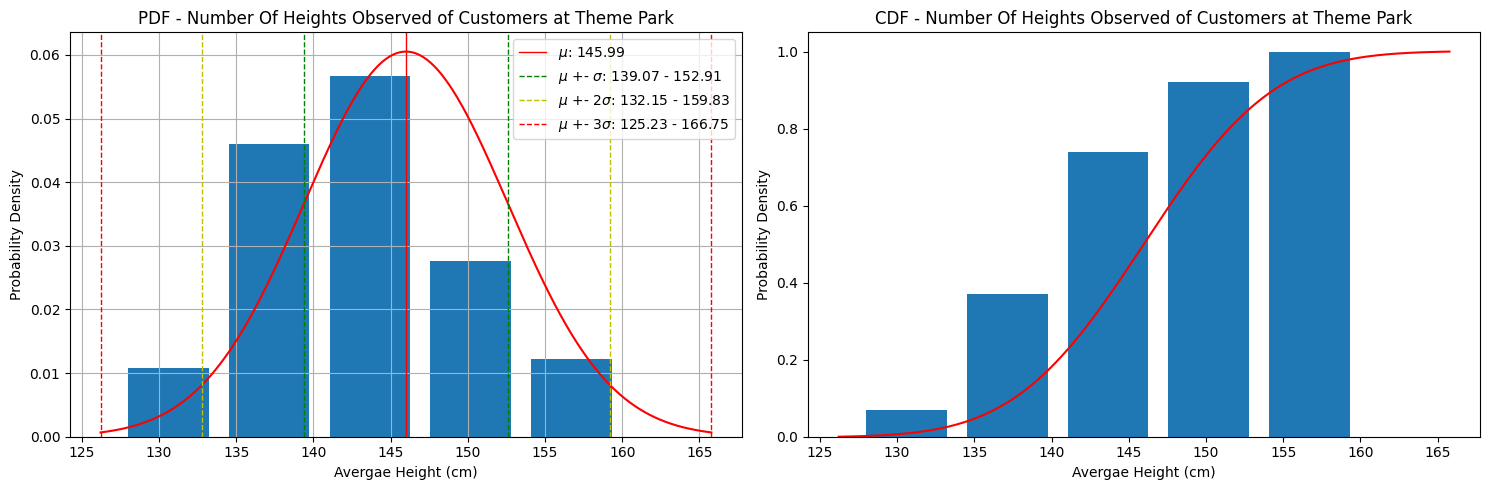

Number Of Heights Observed: 1000
Mean: 145.85165110907099
Standard Deviation: 6.627042118355602
Bin size: 10


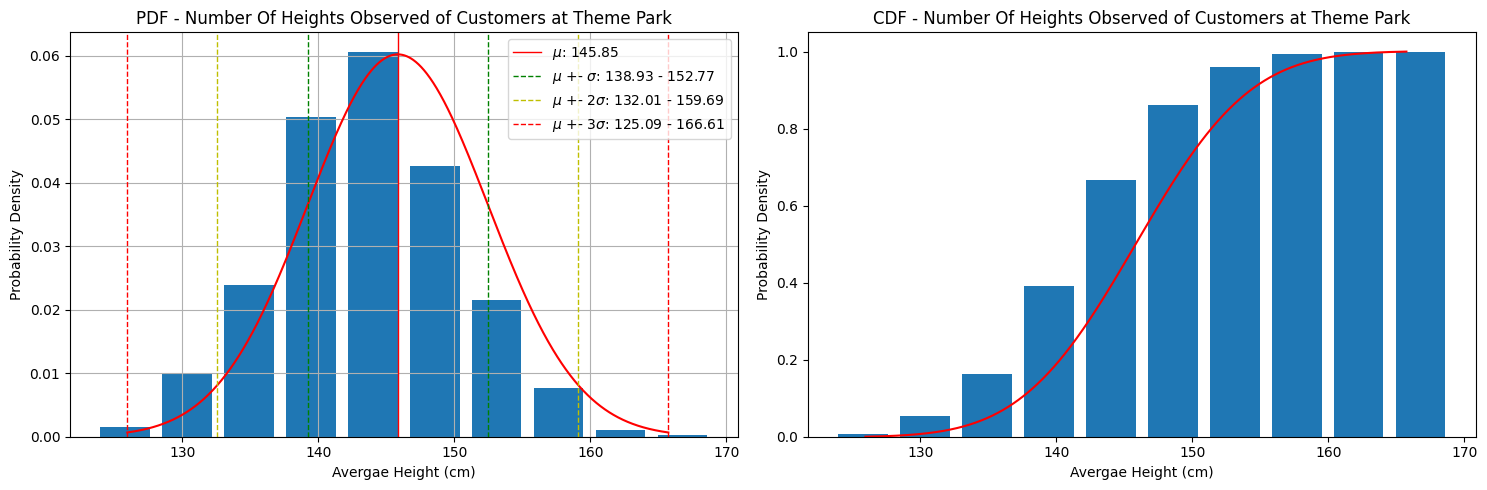

Number Of Heights Observed: 10000
Mean: 146.12247676246747
Standard Deviation: 6.980558625813697
Bin size: 22


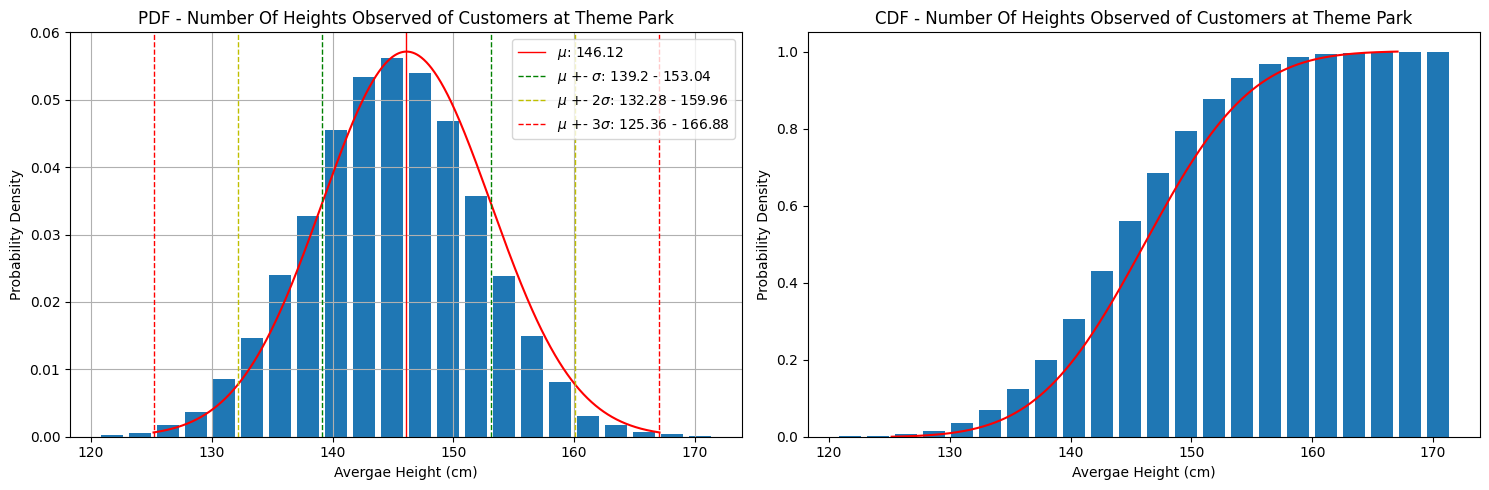

Number Of Heights Observed: 100000
Mean: 145.9879614294758
Standard Deviation: 6.926782638610607
Bin size: 46


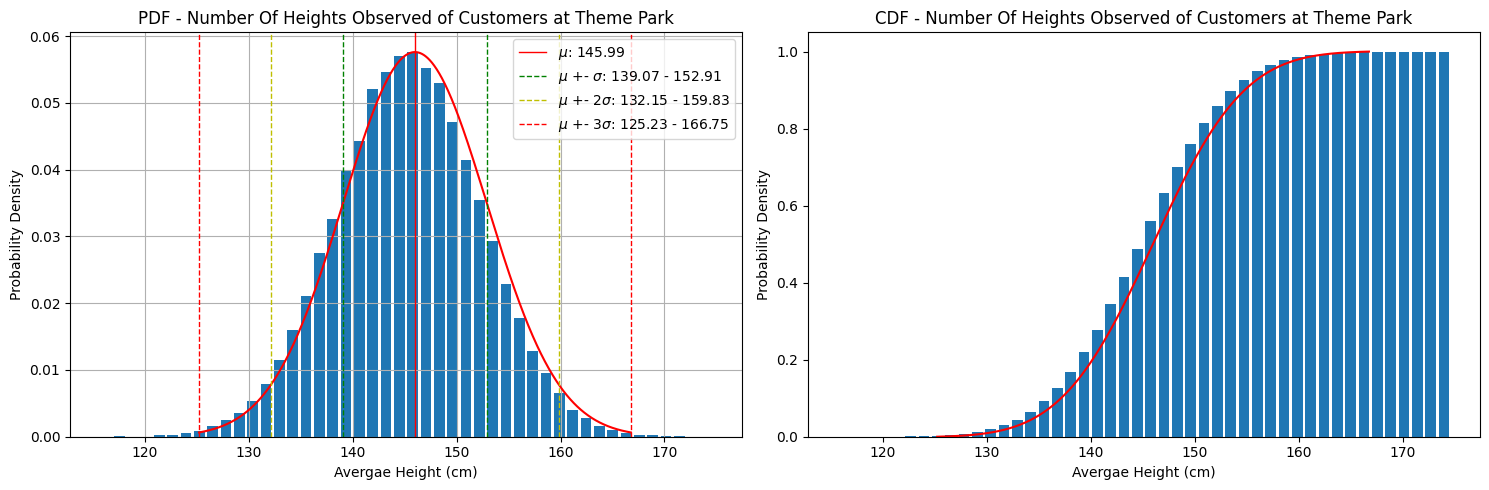

Number Of Heights Observed: 1000000
Mean: 146.00950410103295
Standard Deviation: 6.913831469773128
Bin size: 100


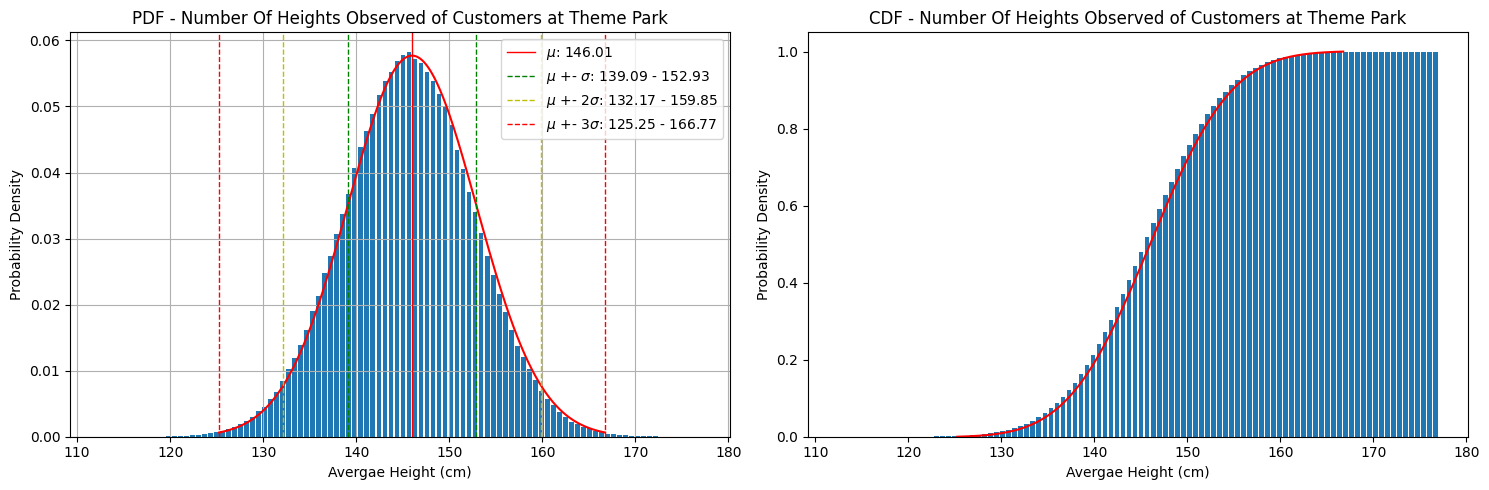

In [5]:
samples_size = [100, 1000, 10000, 100000, 1000000]

for sample_size in samples_size:
    visualise_data(mean, std, sample_size)

### References:

1. https://cdn.who.int/media/docs/default-source/child-growth/growth-reference-5-19-years/height-for-age-(5-19-years)/hfa-girls-5-19years-per.pdf?sfvrsn=d89b86f2_4
2. https://cdn.who.int/media/docs/default-source/child-growth/growth-reference-5-19-years/height-for-age-(5-19-years)/hfa-boys-5-19years-per.pdf?sfvrsn=56a734fa_4
3. https://www.me.psu.edu/cimbala/me345/Lectures/Histograms.pdf

## Reflection

**Effect of Bigger Sample Size:** One critical aspect to consider is the impact of sample size on the shape of the distribution. When we have a larger sample size, the Central Limit Theorem comes into play. This theorem states that the distribution of the sample means, for sufficiently large sample sizes, approaches a normal distribution, even if the underlying population distribution is not normal. 

As the population size of the generated heights increases its clearly visible the both the mean and the standard deviation are approaching the expected calculated mean of 146 and standard deviation of 6.9196. As the population size increases we can observe that the normal distribution is being met as the graph results in a symmetric, bell-shaped curve the data points are distributed symmetrically around the mean, with tails extending infinitely in both directions.

**Also as the population size increase the CDF graph starts to smooth out as expected and take on the S shape.**

### Forum Reviews:

1. Based on Jason Coleman's review I've added a legend to the PDF Graph and removed unnecessary methods which were wrapping both the np.mean() and np.std() methods. Rather than using random bins sizes.
2. Based on Vaclav's Krol suggestions I've added the `Rice Rule` [3] to calculate the number of bins. Initally I've used the `Square Root Rule` but upon experimentation, I've decided to use the `Rice Rule` as the `Square Root Rule` was yield bins count to large for population size > 1000. 